<a href="https://colab.research.google.com/github/hygoni/ToyTorch/blob/master/Tutorials/Pytorch%20Tutorial%20for%20Deep%20Learning%20Lovers/Artificial%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import torch
import torch.nn as nn
import torch.utils.data as datautils
import torch.optim as optim
from torch.autograd import Variable

from sklearn.model_selection import train_test_split

import pandas as pd

cuda = torch.cuda.is_available()
cuda

True

## Preparing Dataset

In [8]:
from google.colab import files
print('Upload kaggle.json')
files.upload() 
!cp kaggle.json /root/.kaggle/
!kaggle competitions download -c digit-recognizer
!ls

Upload kaggle.json


Saving kaggle.json to kaggle (1).json
 94% 69.0M/73.2M [00:00<00:00, 126MB/s]
100% 73.2M/73.2M [00:00<00:00, 165MB/s]
 88% 43.0M/48.8M [00:00<00:00, 107MB/s] 
100% 48.8M/48.8M [00:00<00:00, 139MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 72.4MB/s]
'kaggle (1).json'   sample_data		    test.csv
 kaggle.json	    sample_submission.csv   train.csv


In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [0]:
image_numpy = train.loc[:, train.columns != 'label'].values / 255
label_numpy = train.label.values

In [12]:
image_numpy

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
label_numpy

array([1, 0, 1, ..., 7, 6, 9])

In [0]:
image_train, image_test, label_train, label_test = train_test_split(image_numpy, label_numpy, test_size = 0.2, random_state=43)

In [0]:
image_train = torch.from_numpy(image_train).float()
label_train = torch.from_numpy(label_train).type(torch.LongTensor)

image_test = torch.from_numpy(image_test).float()
label_test = torch.from_numpy(label_test).type(torch.LongTensor)

In [0]:
train_set = datautils.TensorDataset(image_train, label_train)
test_set = datautils.TensorDataset(image_test, label_test)

train_loader = datautils.DataLoader(train_set, batch_size = 100, shuffle = False)
test_oader = datautils.DataLoader(test_set, batch_size = 100, shuffle = False)

## Building Model

In [0]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.ann = nn.Sequential(
            nn.Linear(28 * 28, 100),
            nn.Tanh(),
            nn.Linear(100, 30),
            nn.Tanh(),
            nn.Linear(30, 10),
            nn.ELU()
        )
        
        if cuda:
            self.ann = self.ann.cuda()
        
    def forward(self, x):
        out = self.ann(x)
        return out

In [18]:
net = ANN()
net

ANN(
  (ann): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): Tanh()
    (2): Linear(in_features=100, out_features=30, bias=True)
    (3): Tanh()
    (4): Linear(in_features=30, out_features=10, bias=True)
    (5): ELU(alpha=1.0)
  )
)

## Training

In [21]:
num_epoch = 5
loss_graph = []

get_loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.01)

for epoch in range(num_epoch):
    print('Epoch {}'.format(epoch))
    for x, label in train_loader:
        if cuda:
            x = x.cuda()
            label = label.cuda()
        optimizer.zero_grad()
        out = net(x)
        loss = get_loss(out, label)
        loss.backward()
        optimizer.step()
        loss_graph.append(loss.data)
    print('Last loss : {}'.format(loss_graph[-1]))

Epoch 0
Last loss : 0.17570289969444275
Epoch 1
Last loss : 0.12030458450317383
Epoch 2
Last loss : 0.14186182618141174
Epoch 3
Last loss : 0.11112356185913086
Epoch 4
Last loss : 0.039227500557899475


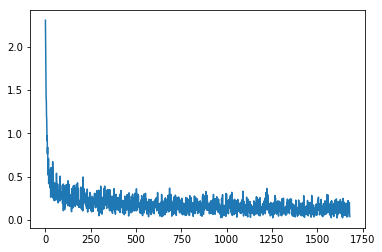

In [22]:
import matplotlib.pyplot as plt
plt.plot(loss_graph)